# Importing Libraries

In [50]:
# ignore warning
import warnings
warnings.filterwarnings('ignore')

# data manipulation
import pandas as pd

# data visulization
import matplotlib.pyplot as plt
import seaborn as sns

# model building
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression,Ridge,Lasso,ElasticNet
from sklearn.metrics import r2_score
from sklearn.ensemble import VotingRegressor

# Load Data

In [51]:
# load data
data = pd.read_csv('Advertising.csv')
data.head()

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [52]:
# drop unnecessary col
data = data.drop(columns=['Unnamed: 0'])

In [53]:
# info about data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [54]:
# statistics of data
data.describe().T

,count,mean,std,min,25%,50%,75%,max
TV,200.0,147.0425,85.854236,0.7,74.375,149.75,218.825,296.4
Radio,200.0,23.2640,14.846809,0.0,9.975,22.90,36.525,49.6
Newspaper,200.0,30.5540,21.778621,0.3,12.750,25.75,45.100,114.0
Sales,200.0,14.0225,5.217457,1.6,10.375,12.90,17.400,27.0


In [55]:
# check null values
data.isna().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

In [56]:
# check duplicates values
data.duplicated().sum()

0

# EDA

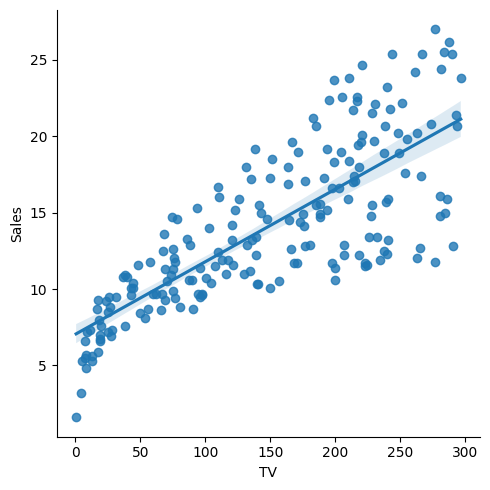

In [57]:
sns.lmplot(data=data,x='TV',y='Sales')
plt.show()

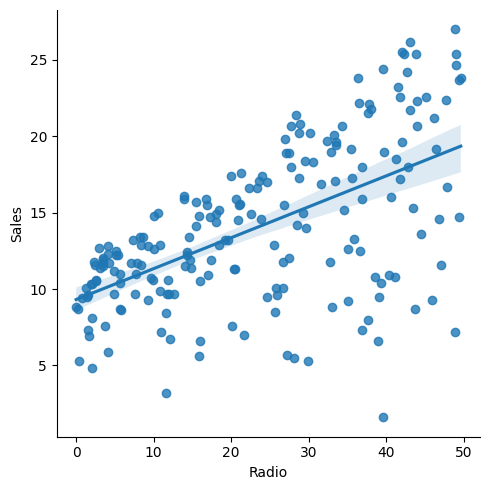

In [58]:
sns.lmplot(data=data,x='Radio',y='Sales')
plt.show()

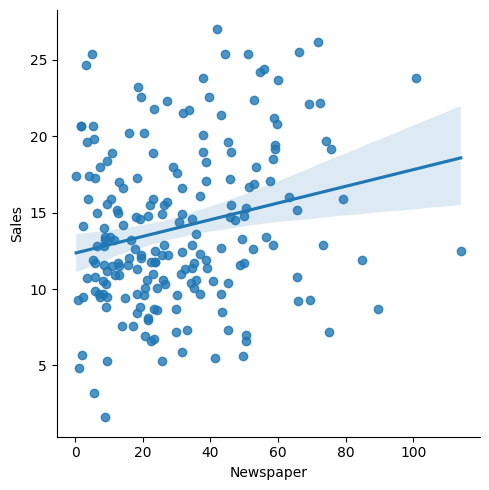

In [59]:
sns.lmplot(data=data,x='Newspaper',y='Sales')
plt.show()

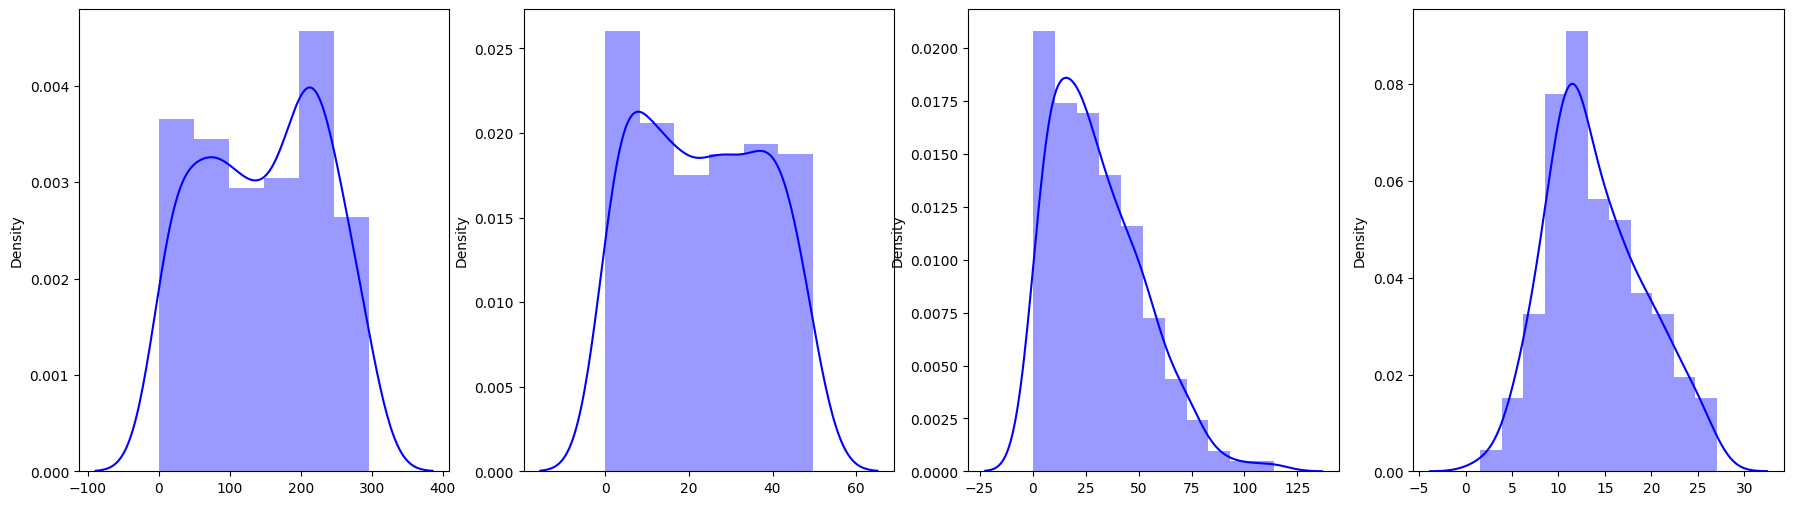

In [60]:
# Dist plot of each cols
fig,axes = plt.subplots(1,4,figsize=(22,6))

sns.distplot(ax=axes[0],x=data['TV'],color='blue')
sns.distplot(ax=axes[1],x=data['Radio'],color='blue')
sns.distplot(ax=axes[2],x=data['Newspaper'],color='blue')
sns.distplot(ax=axes[3],x=data['Sales'],color='blue')
plt.show()


# Extract Target and Input cols

In [61]:
# Extract target and input cols
features = data[['TV','Radio','Newspaper']]
target = data['Sales']

# Spliting the data

In [62]:
# train test spliting
X_train,X_test,y_train,y_test = train_test_split(features,target,test_size=0.2,random_state=42)

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(160, 3) (40, 3) (160,) (40,)


# Scaling

In [63]:
sc = StandardScaler()
X_train_sc = sc.fit_transform(X_train)
X_test_sc = sc.transform(X_test)

# Model Building & Model Evaluation 

In [64]:
# linear regression
lr = LinearRegression()
lr.fit(X_train,y_train)
y_pred = lr.predict(X_test)
print(r2_score(y_test,y_pred))

0.899438024100912


In [65]:
print(lr.coef_)
print(lr.intercept_)

[0.04472952 0.18919505 0.00276111]
2.9790673381226256


In [66]:
# ridge regression
r = Ridge(alpha=0.3,solver='cholesky')
r.fit(X_train,y_train)
r_pred = r.predict(X_test)
print(r2_score(y_test,r_pred))

0.8994380483184331


In [67]:
# lasso regression
l = Lasso()
l.fit(X_train,y_train)
l_pred = l.predict(X_test)
print(r2_score(y_test,l_pred))

0.9004013443377963


In [68]:
print(l.coef_)
print(l.intercept_)

[0.04463068 0.18535048 0.00142196]
3.1219436998391465


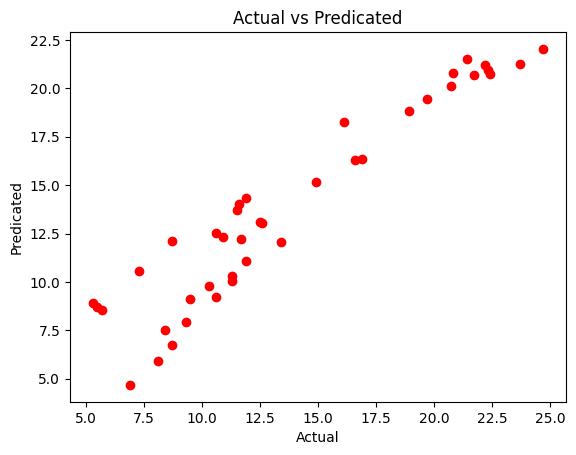

In [69]:
# Actual vs Predicated Values
plt.scatter(y_test,l_pred,c='red')
plt.title('Actual vs Predicated')
plt.xlabel('Actual')
plt.ylabel('Predicated')
plt.show()

In [70]:
# ElasticNet regression
e = ElasticNet(alpha=0.1,l1_ratio=0.4)
e.fit(X_train,y_train)
e_pred = e.predict(X_test)
print(r2_score(y_test,e_pred))

0.8994843795206078


In [71]:
# Ensemble technique 
voting = VotingRegressor(estimators=[
    ('lr',LinearRegression()),
    ('r',Ridge(alpha=0.3,solver='cholesky')),
    ('l',Lasso()),
    ('e',ElasticNet(alpha=0.5,l1_ratio=0.4))
])

voting.fit(X_train,y_train)
v_pred = voting.predict(X_test)
print(r2_score(y_test,v_pred))

0.8997666927012228


In [72]:
lr_sc = LinearRegression()
lr_sc.fit(X_train_sc,y_train)
lr_sc_pred = lr_sc.predict(X_test_sc)
print(r2_score(y_test,lr_sc_pred))

0.8994380241009119


# Save Model

In [73]:
import pickle
pickle.dump(l,open('sales_model.pkl','wb'))

## We used LASSO without scaling for predication

# Load Model

In [74]:
sales_prediction_model = pickle.load(open('sales_model.pkl','rb'))

# Make Predication

In [75]:
predication = pd.DataFrame(data.iloc[:20][['TV','Radio','Newspaper']])
predication['Predicted Sales'] = sales_prediction_model.predict(predication)
predication

,TV,Radio,Newspaper,Predicted Sales
0,230.1,37.8,69.2,20.496111
1,44.5,39.3,45.1,12.456413
2,17.2,45.9,69.3,12.495720
3,151.5,41.3,58.5,17.621651
4,180.8,10.8,58.4,13.275998
5,8.7,48.9,75.0,12.680516
6,57.5,32.8,23.5,11.801120
7,120.2,19.6,11.6,12.135916
8,8.6,2.1,1.0,3.896426
9,199.8,2.6,21.2,12.551210
